<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural
# Fabio Peña

## Taller #7: Clasificación y Agrupación
`Fecha de entrega: Octubre 24, 2020. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [3]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [4]:
# Cargar datos
path = 'C:/Users/ITHELATH/Documents/Laptop Col/dektop/NLP/Taller 7/reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


# Parte 1: Clasificación

### `[6 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [30]:
entrenamiento, prueba = train_test_split(data)
print(entrenamiento)


      review_id          product_id          reviewer_id  stars  \
160  es_0915319  product_es_0774444  reviewer_es_0228027      1   
356  es_0213081  product_es_0924716  reviewer_es_0351127      5   
517  es_0867582  product_es_0475262  reviewer_es_0002421      2   
827  es_0251788  product_es_0768929  reviewer_es_0806260      5   
58   es_0824877  product_es_0470821  reviewer_es_0376690      4   
..          ...                 ...                  ...    ...   
307  es_0354016  product_es_0514390  reviewer_es_0779920      4   
164  es_0777539  product_es_0990885  reviewer_es_0794518      1   
329  es_0462803  product_es_0715266  reviewer_es_0400121      4   
522  es_0318094  product_es_0677319  reviewer_es_0700769      2   
187  es_0294751  product_es_0926755  reviewer_es_0190587      4   

                                           review_body  \
160  Horrible!! Quedaron conmigo en que lo enviaban...   
356  Muy orgullosos con esta compra, se ve de alta ...   
517  Tendría que espe

In [31]:
entrenamiento, prueba = train_test_split(data)
print(prueba)


      review_id          product_id          reviewer_id  stars  \
459  es_0620605  product_es_0555027  reviewer_es_0831964      1   
588  es_0226104  product_es_0447327  reviewer_es_0818506      5   
100  es_0352869  product_es_0129153  reviewer_es_0227658      3   
952  es_0494988  product_es_0336733  reviewer_es_0365682      2   
986  es_0545278  product_es_0707266  reviewer_es_0349353      3   
..          ...                 ...                  ...    ...   
315  es_0523596  product_es_0979295  reviewer_es_0681383      1   
706  es_0072675  product_es_0870353  reviewer_es_0807717      1   
74   es_0358838  product_es_0448776  reviewer_es_0402853      3   
409  es_0332241  product_es_0068127  reviewer_es_0093474      5   
562  es_0547976  product_es_0315591  reviewer_es_0611038      1   

                                           review_body      review_title  \
459         Mucho tiempo en llegar y el artículo fatal      Decepcionada   
588  MUY CONTENTO Y SATISFECHO CON EL ARTÍC

###  `[6 pts]` Punto 2: Hacer pre-procesamiento del texto

In [28]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [29]:
X_train = tfidf_vect.fit_transform(entrenamiento.review_title.values)
y_train = entrenamiento.product_category.values

X_test = tfidf_vect.transform(prueba.review_title.values)
y_test = prueba.product_category.values

###  `[6 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, u otro.

In [39]:
logreg= LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

###  `[6 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [48]:
# Hacemos las predicciones para los datos de prueba (test)
y_pred_logreg = logreg.predict(X_test)

In [68]:
metrica = accuracy_score
print(f"{metrica(y_test, y_pred_logreg):>.2f}")

0.84


In [71]:
metrica = precision_score
print(f"{metrica(y_test, y_pred_logreg, pos_label='jewelry'):>.2f}")

0.87


In [73]:
metrica = recall_score
print(f"{metrica(y_test, y_pred_logreg, pos_label='jewelry'):>.2f}")

0.80


###  `[BONUS: 3 pts]` Matriz de confusión

###  `[BONUS: 1 pts]` Términos más importantes de cada categoría

# Parte 2: Agrupación

###  `[6 pts]` Punto 1: Hacer pre-procesamiento del texto

In [74]:
tfidf_vectKMeans = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vectKMeans.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectKMeans.get_feature_names())

###  `[6 pts]` Punto 2: Método del codo para determinar $K$

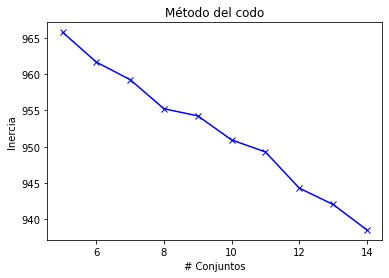

In [85]:
ks = []
k_inertia = []

for k in range(5,15):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    k_inertia.append(kmeans.inertia_)

plt.xlabel("# Conjuntos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertia, 'bx-')

###  `[6 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [86]:
k = 8
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=3, metric="euclidean").fit(tfidf_matrix.values)
data['cluster'] = model.labels_

###  `[BONUS: 3 pts]` Visualización usando PCA

In [97]:
data['review_short'] = data['review_title'].apply(lambda texto: texto[:10])
pca = PCA(n_components=2)
 
result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.review_short.values
 
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['cluster'].values)) 
 
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Parte 3: Comparación

### `[6 pts]` Punto 1: Hacer predicción para estas dos frases de los dos modelos

In [99]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
# transformar con tfidf usado para clasificación
# transformar con tfidf usado para agrupación
# resultado para clasificación
# resultado para agrupación

testTransformadoClasificacion = tfidf_vect.transform(test)
testTransformadoCluster = tfidf_vectKMeans.transform(test)
logreg.predict(testTransformadoClasificacion)

array(['video_games', 'jewelry'], dtype=object)

In [100]:
model.predict(testTransformadoCluster)

array([2, 7])

### `[2 pts]` Punto 2: Preguntas

- ¿A cuál modelo le fue mejor? 
- ¿Cuál modelo se demoró más en entrenar? 
- Según los resultados del $K$-Means, ¿cuál es la estructura latente de los datos?
- ¿Alguna otra observación?